In [5]:
using Pkg
Pkg.activate("../Project.toml")

using ITensors
using Plots
import NDTensors
using Random
using Symbolics
using Latexify
include("structs.jl")
include("summary.jl")
include("utils.jl")

  Activating project at `~/Documents/QuantumInspiredML/QuantumInspiredML`


loadMPS_tests (generic function with 1 method)

In [2]:
ts_len=96
xs=0:1/96:1;

In [3]:
nCr(n,r) = factorial(n) / (factorial(r) * factorial(n-r))

function trigfmap(s,d)
    return x-> sqrt(nCr(d-1,s-1)) *cospi.(x/2).^(d-s) .* sinpi.(x/2).^(s-1)
end


function plotfeaturemap(xs,d)
    ys = trigfmap(1,d)
    plot(xs,ys(xs))
    for s = 2:d
        ys = trigfmap(s,d)
        plot!(xs,ys(xs))
    end
end

plotfeaturemap (generic function with 1 method)

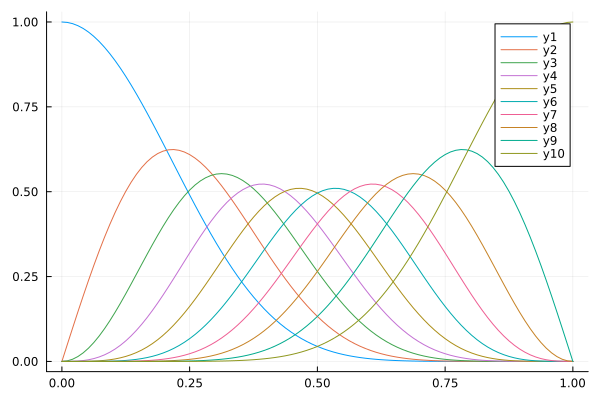

In [4]:
d=10
ys = trigfmap(1,d)
p = plot(xs,ys(xs))
for s = 2:d
    ys = trigfmap(s,d)
    plot!(xs,ys(xs))
end
p

In [41]:
struct trigFT_te
    sinpow::Int
    cospow::Int
    function trigFT_te(sinp::Int, cosp::Int)
        @assert sinp >= 0 && cosp >= 0 "trigFT does not support negative powers"
        new(sinp, cosp)
    end
end 

dec_sin!(t::trigFT_te) = trigFT_te(t.sinpow - 1, t.cospow)
dec_cos!(t::trigFT_te) = trigFT_te(t.sinpow , t.cospow - 1)

dec_cos! (generic function with 1 method)

In [42]:
@variables w
@syms f(w)
function integrate(tFT::trigFT_te, angle::Real; basefft=f)
    if tFT.sinpow != 0
        out = (integrate(dec_sin!(tFT), angle - 1/4) - integrate(dec_sin!(tFT), angle + 1/4))/2im
    elseif tFT.cospow !=0
        out = (integrate(dec_cos!(tFT), angle - 1/4) + integrate(dec_cos!(tFT), angle + 1/4))/2
    else
        out = basefft(angle)
    end
    return out
end

function integrate(tFT::trigFT_te, angle::Real; basefft=f)
    if tFT.cospow !=0
        out = (integrate(dec_cos!(tFT), angle - 1/4) + integrate(dec_cos!(tFT), angle + 1/4))/2tFT.sinpow != 0
    elseif
        out = (integrate(dec_sin!(tFT), angle - 1/4) - integrate(dec_sin!(tFT), angle + 1/4))/2im
    else
        out = basefft(angle)
    end
    return out
end

integrate (generic function with 1 method)

(0.0 - 0.5im)*((1//2)*(f(-0.5 + w) + f(w)) - (1//2)*(f(w) + f(0.5 + w)))

In [9]:
function trigpol(i,d)
    @assert i <= 2*d "Function index out of Bounds"
    if isodd(i)
        n = ceil(i/2)
        func = x -> sin.(n*x*pi/2)
    else
        n = i/2
        func = x -> cos.(n*x*pi/2)
    end

    return func
end

function plot_trigpol(xs,d)
    ys = trigpol(1,d)
    p = plot(xs,ys(xs))
    for s = 2:d
        ys = trigpol(s,d)
        plot!(xs,ys(xs))
    end
    return p
end

plot_trigpol (generic function with 1 method)

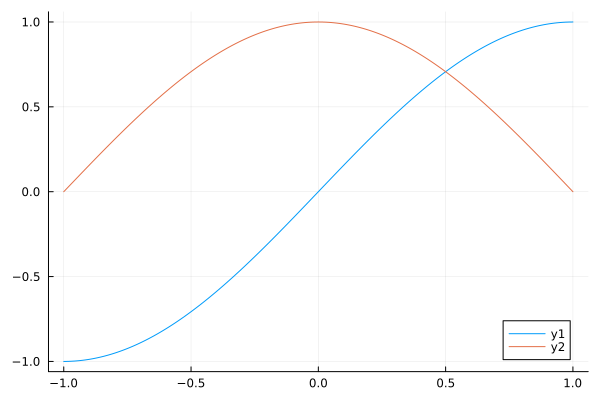

In [10]:
ts_len=96
endp = pi/4
xs=-1:1/96:1;

plot_trigpol(xs,2)

In [53]:
function sahand(x::Float64, i::Int,d::Int)
    dx = 2/d # width of one interval
    interval = ceil(i/2)
    startx = (interval-1) * dx
    if startx <= x <= interval*dx
        if isodd(i)
            s = cospi(0.5 * (x - startx)/dx )
        else
            s = sinpi(0.5 * (x - startx)/dx )
        end
    else
        s = 0
    end

    return s
end

sahand (generic function with 1 method)

In [54]:
function plot_sahand(xs,d)
    ys = [sahand(x,1,d) for x in xs]
    p = plot(xs,ys)
    for s = 2:d
        ys = [sahand(x,s,d) for x in xs]
        plot!(p,xs,ys)
    end
    return p
end

plot_sahand (generic function with 1 method)

In [57]:
plot!

plot! (generic function with 4 methods)

p = Plot{Plots.GRBackend() n=10}


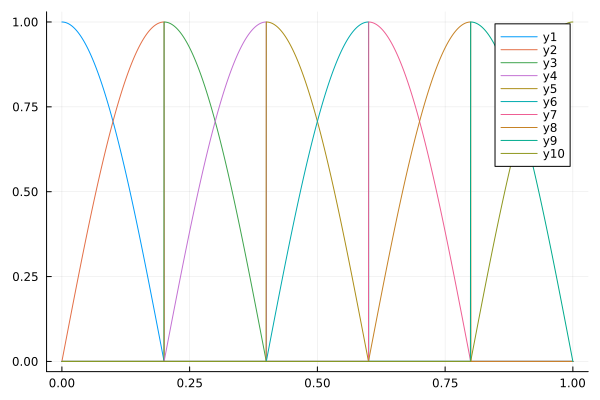

In [66]:
ts_len=2000
endp = pi/4
xs=0:1/ts_len:1;
d = 10


p = plot_sahand(xs,d)
@show p

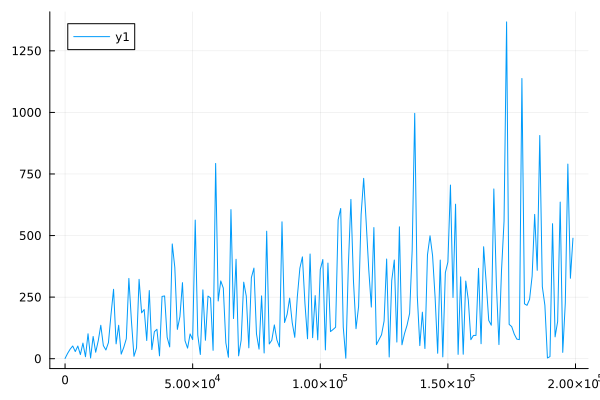

In [6]:
# check sums of randn
ns= 1:1000:200000
ntrials=100

ys = []

for n in ns
    y = []
    for tr = 1:ntrials
        push!(y,sum(randn(n)))
    end
    push!(ys,std(y))
end
plot(ns,abs.(ys))


In [8]:
std

std (generic function with 16 methods)

In [5]:
i = Index(3; tags="i")
j = Index(2; tags="j")
T = randomITensor(j, i)

for iv in eachval(i)
    @show iv
end

iv = 1
iv = 2
iv = 3


In [7]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_splits_txt("datasets/ECG_train.txt", 
   "datasets/ECG_val.txt", "datasets/ECG_test.txt")

(([-0.19441323 -1.1007149 … 0.9638794 1.0141616; 1.2215121 3.5215769 … 0.099830079 0.31919841; … ; 1.1593518 2.5344027 … -0.081739151 0.035595301; 1.4684175 3.2539464 … -0.021530855 0.14479403], [0, 0, 1, 1, 1, 1, 1, 1, 0, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 0]), ([0.59782907 1.2574276 … -0.17684524 -0.11922008; 1.3971093 2.2885831 … 0.83666822 0.42748505; … ; 0.50205548 0.54216265 … 0.71381545 0.43376464; 0.6303957 2.1919773 … -0.48868911 -0.23231543], [1, 0, 1, 0, 1, 1, 1, 1, 0, 1]), ([0.42518938 1.4185988 … -0.14248753 0.098758141; 0.65392929 2.1772899 … 0.17110719 0.19702731; … ; 2.3182077 2.1397723 … 0.28500798 0.4709143; 2.3953288 3.2836971 … 0.072659649 0.21594169], [1, 1, 1, 1, 0, 1, 1, 1, 1, 0  …  1, 0, 1, 1, 1, 1, 1, 0, 0, 1]))

In [10]:
size(X_test)[1]

100

In [49]:
arr = [1,4,56,-10, "l", 'l', "-1",-1,1]


9-element Vector{Any}:
   1
   4
  56
 -10
    "l"
    'l': ASCII/Unicode U+006C (category Ll: Letter, lowercase)
    "-1"
  -1
   1

In [50]:
unique(arr)

8-element Vector{Any}:
   1
   4
  56
 -10
    "l"
    'l': ASCII/Unicode U+006C (category Ll: Letter, lowercase)
    "-1"
  -1

In [51]:
labels_s = []
labels_u = unique(arr)
labels_int = 0:(length(labels_u) - 1)
lmap = Dict{Any,Int}()

# if arr_u_test !== ... 
try
    labels_s = sort(labels_u)
catch e
    if isa(e, MethodError)
        @warn "The class labels are not sortable!  ($e)\n indexing them in the order they are provided"
        labels_s = labels_u
    end
end

for (i,l) in enumerate(labels_s)
    lmap[l] = i -1
end

labels = Vector{Int}(undef, length(arr))

for (i,l) in enumerate(arr)
    labels[i] = lmap[l]
end
@show labels

labels = [0, 1, 2, 3, 4, 5, 6, 7, 0]


┌ Warning: The class labels are not sortable!  (MethodError(isless, ("l", 56), 0x0000000000007c76))
│  indexing them in the order they are provided
└ @ Main /home/noodles/Documents/QuantumInspiredML/QuantumInspiredML/LogLoss/ffts.ipynb:11


9-element Vector{Int64}:
 0
 1
 2
 3
 4
 5
 6
 7
 0

In [37]:
lmap = Dict{Any,Int}()

lmap['l'] = 1
lmap[1] = 2

@show lmap

lmap = Dict{Any, Int64}('l' => 1, 1 => 2)


Dict{Any, Int64} with 2 entries:
  'l' => 1
  1   => 2

In [32]:
sort(unique(y_test))

2-element Vector{Int64}:
 0
 1

In [2]:
function generate_startingMPS(χ_init, site_indices::Vector{Index{Int64}};
    num_classes = 2, random_state=nothing)
    """Generate the starting weight MPS, W using values sampled from a 
    Gaussian (normal) distribution. Accepts a χ_init parameter which
    specifies the initial (uniform) bond dimension of the MPS."""
    
    if random_state !== nothing
        # use seed if specified
        Random.seed!(random_state)
        println("Generating initial weight MPS with bond dimension χ = $χ_init
        using random state $random_state.")
    else
        println("Generating initial weight MPS with bond dimension χ = $χ_init.")
    end

    W = randomMPS(ComplexF64,site_indices, linkdims=χ_init)

    label_idx = Index(num_classes, "f(x)")

    # get the site of interest and copy over the indices at the last site where we attach the label 
    old_site_idxs = inds(W[end])
    new_site_idxs = old_site_idxs, label_idx
    new_site = randomITensor(new_site_idxs)

    # add the new site back into the MPS
    W[end] = new_site

    # normalise the MPS
    normalize!(W)

    # canonicalise - bring MPS into canonical form by making all tensors 1,...,j-1 left orthogonal
    # here we assume we start at the right most index
    last_site = length(site_indices)
    orthogonalize!(W, last_site)

    return W

end


generate_startingMPS (generic function with 1 method)

In [6]:
random_state=123456
update_iters = 9
χ_init = 4
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_splits_txt("datasets/ECG_train.txt", 
    "datasets/ECG_val.txt", "datasets/ECG_test.txt")

X_train = vcat(X_train, X_val)
y_train = vcat(y_train, y_val)   
   
# first, create the site indices for the MPS and product states 
num_mps_sites = size(X_train)[2]
sites = siteinds("S=1/2", num_mps_sites)
println("Using χ_init=$χ_init and a maximum of $nsweep sweeps...")
println("Using $update_iters iterations per update.")

# now let's handle the training/validation/testing data
# rescale using a robust sigmoid transform
scaler = fit_scaler(RobustSigmoidTransform, X_train; positive=true);
X_train_scaled = transform_data(scaler, X_train)
X_val_scaled = transform_data(scaler, X_val)
X_test_scaled = transform_data(scaler, X_test)

# generate product states using rescaled data

training_states = generate_all_product_states(X_train_scaled, y_train, "train", sites)
validation_states = generate_all_product_states(X_val_scaled, y_val, "valid", sites)
testing_states = generate_all_product_states(X_test_scaled, y_test, "test", sites)

# generate the starting MPS with unfirom bond dimension χ_init and random values (with seed if provided)
num_classes = length(unique(y_train))
W = generate_startingMPS(χ_init, sites; num_classes=num_classes, random_state=random_state)


    ;

Using χ_init=4 and a maximum of nsweep sweeps...
Using 9 iterations per update.
Initialising train states.
Initialising valid states.
Initialising test states.
Generating initial weight MPS with bond dimension χ = 4
        using random state 123456.


ComplexF64 (alias for Complex{Float64})

In [ ]:
@show ps[2]

@show psc[2]

ps[2] = -0.18403182251595995 + 0.9809770924363289im
psc[2] = -0.18403182251595995 - 0.9809770924363289im


-0.18403182251595995 - 0.9809770924363289im

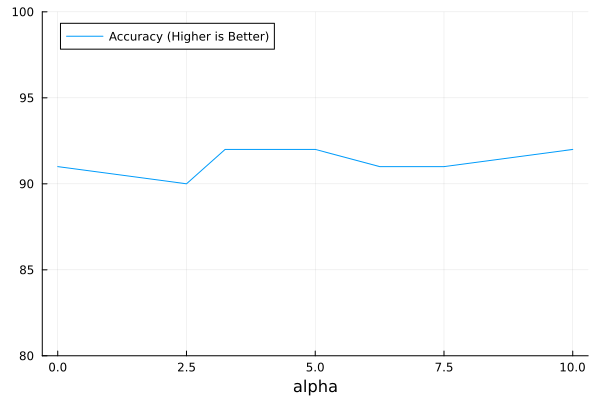

In [56]:
xs = [0,2.5,3.25,5,6.25,7.5,10]

klds = [11.6,11.6,11.9,11.7,11.8,11.8,12.5]

accs = [91,90,92,92,91,91,92]

plot(xs, accs,label="Accuracy (Higher is Better)",legend=:topleft,ylims=(80,100), xlabel="alpha")
#plot(xs, klds,color=:red,label="KLDS")

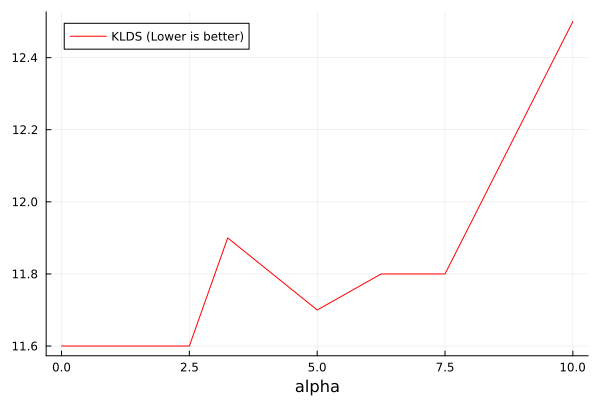

In [57]:
plot(xs, klds,color=:red,label="KLDS (Lower is better)", xlabel="alpha")